In [ ]:
## EDA recommendation:
## 1: Run a quantitative analysis on the prices charged per KM travelled using scatter plots and lines of best fit to find trends.
## 2: Run a time-based analysis on the number of customers for each month over the years using line graphs, to find any potential trends in seasonality. 
## 3: Run a quantitative analysis on the number of customers in each city to find any correlation, or lack thereof, between population and number of customers.
## 4: Run a quantitative analysis on the number of male vs. female users to see if there exists a gender gap in the number of customers.
## 5: Run a quantitative analysis on the age of both male and female users vs. their age groups average income, to find any correlation and look for a target customer base. 


## Hypothesese:
## H1: The number of monthly customers is affected by the weather. Months more prone to snow and rain will show a higher average number of customers.
## H2: Population does not directly correlate with customers. Some higher population cities will have a lower ratio of Customers to Population when compared to others.
## H3: There will be a higher number of male customers compared to female customers. Male customers will feel more safe using standard cab services compared to female customers due to
# ## driver profiled ride requesting apps.
## H4: There will be a gap in Average Monthly Income between males and females that could account for any gaps in the number of customers in a given gender. 
## H5: There exists variability in the cost paid by the customer per km travelled. This will allow XYZ to find average prices to charge customers to beat out competitors.

In [6]:
import datetime as dt
import pandas as pd

## Load in data
CabData = pd.read_csv("DATASETS/Cab_Data.csv")
CityData = pd.read_csv("DATASETS/City.csv")
CustomerData = pd.read_csv("DATASETS/Customer_ID.csv")
TransactionData = pd.read_csv("DATASETS/Transaction_ID.csv")

## change the date time in CabData
CabData = pd.DataFrame({'date':[42377, 10023]})
CabData['Date_of_Travel'] = pd.TimedeltaIndex(CabData['Date of Travel'], unit='d') + dt.datetime(1900,1,1)
CabData[0:5]

## Uncomment and run on first run through of data to change values from str to int
CityData['Population'] = CityData['Population'].str.replace(',', '').astype(float)
CityData['Users'] = CityData['Users'].str.replace(',', '').astype(float)
CityData = CityData.astype({'Population':'int'})
CityData = CityData.astype({'Users':'int'})

        KM Travelled  Price Charged   Cost of Trip
count  359392.000000  359392.000000  359392.000000
mean       22.567254     423.443311     286.190113
std        12.233526     274.378911     157.993661
min         1.900000      15.600000      19.000000
25%        12.000000     206.437500     151.200000
50%        22.440000     386.360000     282.480000
75%        32.960000     583.660000     413.683200
max        48.000000    2048.030000     691.200000


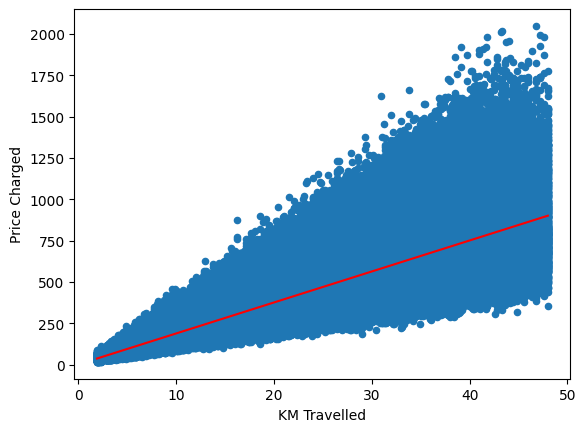

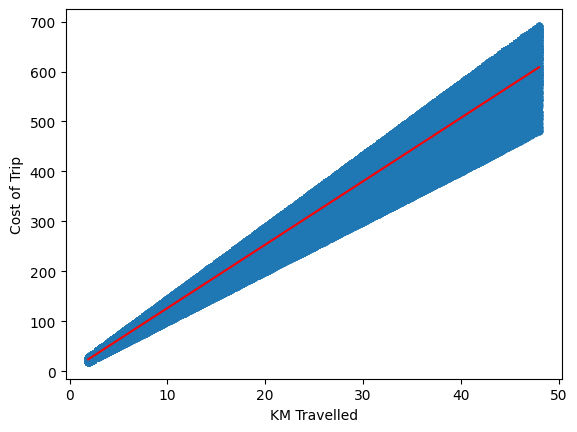

In [29]:
## Plot the cost and prices charged for the trip to ensure correlation
import matplotlib.pyplot as plt
import numpy as np

CabData['Cost per Km'] = CabData['Cost of Trip'] - CabData['KM Travelled']

plt.close("all")
CabData.plot(kind = 'scatter', x = 'KM Travelled', y = 'Price Charged')
plt.plot(np.unique(CabData['KM Travelled']), np.poly1d(np.polyfit(CabData['KM Travelled'], CabData['Price Charged'], 1))(np.unique(CabData['KM Travelled'])), color='r')
CabData.plot(kind = 'scatter', x = 'KM Travelled', y = 'Cost of Trip')
plt.plot(np.unique(CabData['KM Travelled']), np.poly1d(np.polyfit(CabData['KM Travelled'], CabData['Cost of Trip'], 1))(np.unique(CabData['KM Travelled'])), color='r')

## Get the stats for trips and their costs
CabData_stats = pd.DataFrame(CabData, columns = ['KM Travelled', 'Price Charged', 'Cost of Trip'])
stats = CabData_stats.describe(include= 'all')

print(stats)
plt.show()


Month
1      9050
2      6499
3      7220
4      7981
5      8606
6      8108
7      9834
8     11576
9     12655
10    15358
11    14972
12    16654
Name: Month, dtype: int64


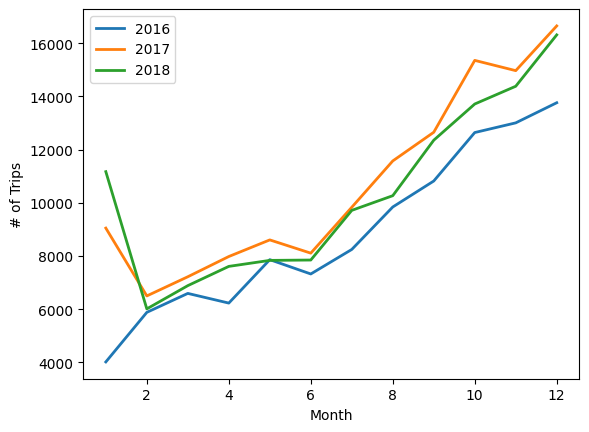

In [4]:
from matplotlib.pyplot import xlabel
import calendar

## Create fields to hold the year and month of travel
CabData_daily = CabData.set_index('Date_of_Travel')
CabData_daily['Year'] = CabData_daily.index.year
CabData_daily['Month'] = CabData_daily.index.month

## Create a dataset to hold the data from 2016, grouped by month to find total number of trips in every month
CabData_2016 = CabData_daily.loc['2016']
CabData_2016 = CabData_2016.groupby(['Month'])['Month'].count()
## Plot the number of trips per month
CabData_2016.plot(linewidth=2, label = '2016')


## Create a dataset to hold the data from 2017, grouped by month to find total number of trips in every month
CabData_2017 = CabData_daily.loc['2017']
CabData_2017 = CabData_2017.groupby(['Month'])['Month'].count()
## Plot the number of trips per month
CabData_2017.plot(linewidth=2, label='2017')

## Create a dataset to hold the data from 2018, grouped by month to find total number of trips in every month
CabData_2018 = CabData_daily.loc['2018']
CabData_2018 = CabData_2018.groupby(['Month'])['Month'].count()
## Plot the number of trips per month
CabData_2018.plot(linewidth=2, label='2018')


print(CabData_2017)

plt.xlabel('Month')
plt.ylabel('# of Trips')
plt.legend()
plt.show()

In [23]:
## Get a ratio of Users to Population to see if there are trends in this
CityData['Ratio'] = CityData['Users'] / CityData['Population']

## Get the stats for a comparison
CityData_stats = CityData.describe()
## Create a field that shows how each Cities ratio compares to the average
CityData['Users Ratio Compared'] = CityData['Ratio'] - CityData_stats['Ratio'][1]

## Print out the data
print(CityData)
print(CityData.loc[0])

         Population          Users      Ratio  Users Ratio Compared
count  2.000000e+01      20.000000  20.000000          2.000000e+01
mean   1.231592e+06   64520.650000   0.074440         -2.775558e-18
std    1.740127e+06   83499.375289   0.109301          1.093005e-01
min    2.489680e+05    3643.000000   0.006497         -6.794348e-02
25%    6.086372e+05   11633.250000   0.013126         -6.131474e-02
50%    7.845590e+05   23429.000000   0.025914         -4.852645e-02
75%    1.067041e+06   91766.000000   0.075753          1.313103e-03
max    8.405837e+06  302149.000000   0.339282          2.648419e-01
                City  Population   Users     Ratio  Users Ratio Compared
0        NEW YORK NY     8405837  302149  0.035945             -0.038495
1         CHICAGO IL     1955130  164468  0.084121              0.009681
2     LOS ANGELES CA     1595037  144132  0.090363              0.015922
3           MIAMI FL     1339155   17675  0.013199             -0.061242
4     SILICON VALLEY   

Gender
Female    22609
Male      26562
Name: Gender, dtype: int64
                Age  Income (USD/Month)
count  26562.000000        26562.000000
mean      35.410361        15040.795460
std       12.621676         7984.809457
min       18.000000         2000.000000
25%       25.000000         8403.000000
50%       33.000000        14694.000000
75%       42.000000        21006.750000
max       65.000000        35000.000000
                Age  Income (USD/Month)
count  22609.000000        22609.000000
mean      35.307621        14986.068601
std       12.572503         8022.676703
min       18.000000         2000.000000
25%       25.000000         8180.000000
50%       33.000000        14608.000000
75%       42.000000        21071.000000
max       65.000000        34996.000000
True


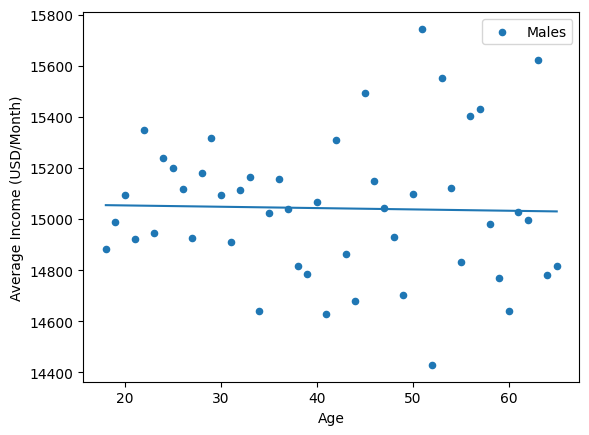

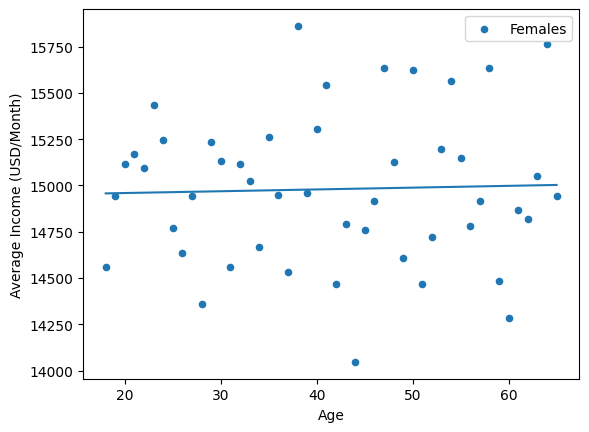

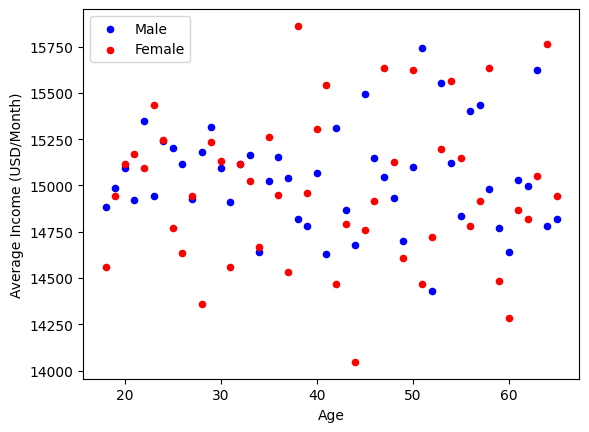

In [22]:
from matplotlib.pyplot import figure
import numpy as np

## Create a dataframe for only males data
Customer_males = CustomerData[CustomerData['Gender']=='Male']
## Get stats for the age and income fields
Customer_males_stats = Customer_males.describe()
## Remove the Customer ID field from the stats
del Customer_males_stats['Customer ID']

## Get the males info and group by Age to plot Income vs. Age
CustomerData_males_demo = Customer_males[['Age', 'Income (USD/Month)']].groupby('Age', as_index=False).mean()
## Rename the Income to Average income
CustomerData_males_demo.rename(columns = {'Income (USD/Month)': 'Average Income (USD/Month)'}, inplace = True)


## Create a dataframe for only females data
Customer_females = CustomerData[CustomerData['Gender']=='Female']
## Get stats for the age and income fields
Customer_females_stats = Customer_females.describe()
## Remove the Customer ID field from the stats
del Customer_females_stats['Customer ID']

## Get the females info and group by Age to plot Income vs. Age
CustomerData_females_demo = Customer_females[['Age', 'Income (USD/Month)']].groupby('Age', as_index=False).mean()
## Rename the Income to Average income
CustomerData_females_demo.rename(columns = {'Income (USD/Month)': 'Average Income (USD/Month)'}, inplace = True)


## group all CustomerData by gender to plot gender vs. income
CustomerData_genders = CustomerData.groupby(['Gender'])['Gender'].count()
print(CustomerData_genders)

## Print out the stats calculated earlier
print(Customer_males_stats)
print(Customer_females_stats)

## plot males age vs. average income
CustomerData_males_demo.plot(kind='scatter', label = 'Males', x='Age', y='Average Income (USD/Month)')
## plot a line of best fit for the males age vs. average income plot
plt.plot(np.unique(CustomerData_males_demo['Age']), np.poly1d(np.polyfit(CustomerData_males_demo['Age'], CustomerData_males_demo['Average Income (USD/Month)'], 1))(np.unique(CustomerData_males_demo['Age'])))
## plot females age vs. average income
CustomerData_females_demo.plot(kind='scatter', label = 'Females', x='Age', y='Average Income (USD/Month)')
## plot a line of best fit for the females age vs. average income plot
plt.plot(np.unique(CustomerData_females_demo['Age']), np.poly1d(np.polyfit(CustomerData_females_demo['Age'], CustomerData_females_demo['Average Income (USD/Month)'], 1))(np.unique(CustomerData_females_demo['Age'])))

## Create a single plot to show both male and female age vs. average income
ax1 = CustomerData_males_demo.plot(kind='scatter', x='Age', y='Average Income (USD/Month)', color='b', label='Male')    
ax2 = CustomerData_females_demo.plot(kind='scatter', x='Age', y='Average Income (USD/Month)', color='r', ax=ax1, label = 'Female')    

print(ax1 == ax2)  # True
plt.legend(loc='upper left')
plt.show()

In [ ]:
## Hypothesis results:

## H1: The number of monthly customers is affected by the weather. Months more prone to snow and rain will show a higher average number of customers.
## R1: The number of customers drops sharply in the begining of the year then starts rising sharply around July. This could be due to snow being present in the early months, warmer weather, 
##     then more precipitation through the later months, along with a drop in temperature.

## H2: Population does not directly correlate with customers. Some higher population cities will have a lower ratio of Customers to Population when compared to others.
## R2: There does not seem to exist a strong correlation between population and number of customers, with only 3 of the cities having a Customer-Population ratio greater than the average,
##     with their population sizes differing quite a bit.
## H3: There will be a higher number of male customers compared to female customers. Male customers will feel more safe using standard cab services compared to female customers due to
# ## driver profiled ride requesting apps.
## R3: There does exist a higher number of male customers than female customers, but it does not seem statistically significant enough to constitute correlation.

## H4: There will be a gap in Average Monthly Income between males and females that could account for any gaps in the number of customers in a given gender. 
## R4: There is a slightly higher Average Monthly Income among male customers, but it does not seem statistically significant enough to constitute correlation.

## H5: There exists variability in the cost paid by the customer per km travelled. This will allow XYZ to find average prices to charge customers to beat out competitors.
## R5: There exists a large variability in both the price charge and cost of trip, with standard deviations of 274.378911 and 157.993661 respectively. XYZ can utilize this to offer a more 
##     consistent price for their customers.